## Pre-processing

### Installing requirements

In [ ]:
pip install -r requirements.txt

### Extracting matrices

#### Extracting dataframes from .csv files

In [2]:
import pandas as pd

def extract_matrix_from_csv(file_path):
    df = pd.read_csv(file_path, header=None)
    matrix = df.values
    return matrix

def save_matrix_to_csv(matrix, output_path):
    df = pd.DataFrame(matrix)
    df.to_csv(output_path, index=False, header=False)

In [3]:
df_concat_final = extract_matrix_from_csv('data/raw/df_concat_final.csv')

feature_imporance_prod_final = extract_matrix_from_csv('data/raw/feature_importance_prod_final.csv')

graph_embeddings = extract_matrix_from_csv('data/raw/graph_embeddings.csv')

subj_embeddings_train = extract_matrix_from_csv('data/raw/subj_embeddings_train.csv')

C:\Users\e1204\AppData\Local\Temp\ipykernel_23004\32011830.py:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,

#### Extracting P from subj_embeddings_train.csv

In [4]:
P_df = pd.read_csv('data/raw/subj_embeddings_train.csv')

# save the values of the first column as a list
P_patients = P_df.iloc[:, 0].tolist()

# compute P as the ndarray of df
P = P_df.values[:, 1:]

#### Extract X from df_concat_final.csv

Here, since df_concat_final.csv also contains some personal information of the patients, not associated to their genetic information, we save them in a separated file, before removing them to obtain a matrix that is coherent with the others.

In [5]:
X_df = pd.read_csv('data/raw/df_concat_final.csv') 

# rename the first column of df
X_df.rename(columns={X_df.columns[0]: 'patient_id'}, inplace=True)

patient_info_list = ['patient_id', 'country', 'age', 'sex', 'sex', 'apoe4', 'disease']

X_df_subset = X_df[patient_info_list]

# remove the extra column named 'sex' (there are two columns with the same name and same values)
X_df_subset = X_df_subset.loc[:, ~X_df_subset.columns.duplicated()]

# create a file containing only patient information (could be useful in a further analysis)
X_df_subset.to_csv('data/result/patient_info.csv', index=False)

In [6]:
# save the values of the first column as a list
X_patients = X_df_subset.iloc[:, 0].tolist()

# remove the columns in df being in patient_info_list
X_df = X_df.drop(columns=patient_info_list)

# save the names of the remaining columns as a list
X_features = X_df_subset.columns[1:].tolist()

# get the list of columns containing at least one NaN value
nan_columns = X_df.columns[X_df.isnull().any()].tolist()

# save the column names in df being in nan_columns in a list
nan_columns_list = nan_columns.copy()

# remove the columns in df being in nan_columns
X_df = X_df.drop(columns=nan_columns)

X = X_df.values

# save the column names in df not being in nan_columns in a list
X_miRNA = X_df.columns.tolist()

#### Extract H from graph_embeddings.csv

In [7]:
df_ge = pd.read_csv('data/raw/graph_embeddings.csv')
df_cf = pd.read_csv('data/raw/df_concat_final.csv')

# extract the column names from df_cf
column_names = df_cf.columns.tolist()

# remove 'Unnamed: 0' from the list of column names
if 'Unnamed: 0' in column_names:
    column_names.remove('Unnamed: 0')

# check if there any duplicate column names in column_names
duplicate_columns = set([x for x in column_names if column_names.count(x) > 1])
print(duplicate_columns)

# delete all the rows in df_ge where 'Unnamed: 0' is not equal to a value in column_names
df_ge = df_ge[df_ge['Unnamed: 0'].isin(column_names)]       # this will keep only the rows where the patient identifier is in column_names

# check if there are any rows in ge with the same 'Unnamed: 0' value
duplicates = df_ge.duplicated(subset=['Unnamed: 0'], keep=False)

# delete the rows in df_ge where 'Unnamed: 0' is duplicated
df_ge = df_ge[~duplicates]
df_ge = df_ge.reset_index(drop=True)

# delete the rows in df_ge where 'Unnamed: 0' is a value in nan_columns_list
df_ge = df_ge[~df_ge['Unnamed: 0'].isin(nan_columns_list)]

H = df_ge.drop(columns=['Unnamed: 0']).values

set()


In [8]:
# save the values of the first column as a list
row_names_list = df_ge.iloc[:, 0].tolist()

H_miRNA = row_names_list.copy()

#### Extracting the feature importance from feature_importance_prod_final.csv

In [10]:
fi_df = pd.read_csv('data/raw/feature_importance_prod_final.csv')

# sort the dataframe by the integer values of the column "Feature"
fi_df['Feature'] = fi_df['Feature'].astype(int)
fi_df = fi_df.sort_values(by='Feature')

# remove the "Importance" column
fi_df = fi_df.drop(columns=['Importance'])

# obtain a new .csv file with the sorted dataframe
fi_df.to_csv('data/result/feature_importance_sorted.csv', index=False)

feature_importance = fi_df.values[:, 1:]  # Exclude the 'Feature' column

#### Verifying correctness in matrix creation

In [11]:
print(P.shape)
print(X.shape)
print(H.shape)

(1256, 128)
(1256, 2558)
(2558, 128)


In [12]:
# check if X_miRNA and H_miRNA are the same
if X_miRNA == H_miRNA:
    print("X_miRNA and H_miRNA are the same.")
else:
    print("X_miRNA and H_miRNA are different.")

# check if P_patients and X_patients are the same
if P_patients == X_patients:
    print("P_patients and X_patients are the same.")
else:
    print("P_patients and X_patients are different.")

X_miRNA and H_miRNA are the same.
P_patients and X_patients are the same.


#### Checking the fact that P is not actually the product between X and H

but scaling with StandardScaler will allow us to check the true relationship between matrices.

In [17]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from numpy.linalg import pinv

P_hat = X @ H                           # n_paz × 128
R2_global = r2_score(P.ravel(), P_hat.ravel())
MSE_global = mean_squared_error(P, P_hat)

print("R² global  :", R2_global)
print("MSE global :", MSE_global)


R² global  : -107920739.21457087
MSE global : 1554301.665152844


In [18]:
scaler_X = StandardScaler().fit(X)
scaler_P = StandardScaler().fit(P)

Xz = scaler_X.transform(X)    # shape (n, m)
Pz = scaler_P.transform(P)    # shape (n, 128)

In [19]:
W_pinv = pinv(Xz) @ Pz        # shape (m, 128)  (m = n° miRNA)
P_hat  = Xz @ W_pinv          # rebuilding P from X

r2_pinv = r2_score(Pz.ravel(), P_hat.ravel())
print("R² pseudo-inverse:", r2_pinv)

R² pseudo-inverse: 1.0


## Estimation of the correlation between miRNA expressions and extracted features

### Lasso coefficients computation

Why Lasso on the entire dataset?

* The method for obtaining the 128 genetic features for each patient already exists; we are not interested in evaluating its ability to use the starting miRNAs to obtain the features. We just need a mapping between the correspondences found between patients and the features and measurements of the miRNA expressions of the patients themselves.

* Lasso is able to return a mapping corresponding to a sparse matrix, which is very useful in our case for highlighting weaker relationships that can be neglected in order to reduce the number of features, understood as columns of the dataset.

#### Identifying the most important features to reduce dataset dimensionality

In [20]:
import os
import numpy as np
from sklearn.linear_model import LassoCV
from tqdm import tqdm

In [21]:
start = 0   # Initial feature index (included)
end = 20    # final feature index (not included)

# extracting the top features based on the feature importance in a previous classification
importance_df = pd.read_csv("data/result/feature_importance_sorted.csv")
importance_df = importance_df.sort_values(by="Normalized_Importance", ascending=False)
top_features = importance_df["Feature"].values  

selected_features = top_features[start:end]
batch_k = len(selected_features)

scaler_X = StandardScaler()
scaler_P = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
P_scaled = scaler_P.fit_transform(P)

coeff_matrix = np.zeros((batch_k, X.shape[1]))

print(f"\nEseguo Lasso per le feature da posizione {start} a {end - 1}:")
for i, feat_idx in tqdm(enumerate(selected_features), total=batch_k, desc="Batch Lasso", unit="feature"):
    y = P_scaled[:, feat_idx]
    lasso = LassoCV(cv=5, max_iter=10000)
    lasso.fit(X_scaled, y)
    coeff_matrix[i, :] = lasso.coef_

coeff_df = pd.DataFrame(
    coeff_matrix,
    index=[f"Feature_{i}" for i in selected_features],
    columns=row_names_list  
)

output_path = "data/result/lasso_coefficients_incremental.csv"

if os.path.exists(output_path):
    existing = pd.read_csv(output_path, index_col=0)
    combined = pd.concat([existing, coeff_df])
    combined.to_csv(output_path)
else:
    coeff_df.to_csv(output_path)

print(f"✔️ Coefficienti salvati (range {start}-{end-1}) in: {output_path}")



Eseguo Lasso per le feature da posizione 0 a 19:


Batch Lasso: 100%|██████████| 20/20 [39:14<00:00, 117.70s/feature]


✔️ Coefficienti salvati (range 0-19) in: data/result/lasso_coefficients_incremental.csv


#### Re-traning Lasso on the reduced dataset

In [22]:
top_k = 300

coeff_df = pd.read_csv("data/result/lasso_coefficients_incremental.csv", index_col=0)

miRNA_influenza = coeff_df.abs().sum(axis=0) 

miRNA_ranked = miRNA_influenza.sort_values(ascending=False)
miRNA_keep = miRNA_ranked.head(top_k).index.tolist()

In [23]:
df_miRNA = pd.read_csv("data/raw/df_concat_final.csv", index_col=0)

miRNA_keep_sorted = [m for m in df_miRNA.columns if m in miRNA_keep]

df_miRNA_filtered = df_miRNA[miRNA_keep_sorted]

df_target = pd.read_csv("data/raw/subj_embeddings_train.csv", index_col=0)

print(df_miRNA_filtered.shape)

(1256, 300)


In [24]:
# Convert to numpy arrays
X = df_miRNA_filtered.values
P = df_target.values

# Standardize the data
scaler_X = StandardScaler()
scaler_P = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
P_scaled = scaler_P.fit_transform(P)

n_feat = P.shape[1]
coeff_matrix = np.zeros((n_feat, X.shape[1]))

print(f"\nExecuting Lasso over all the {n_feat} target features:")
for i in tqdm(range(n_feat), desc="Lasso regressions", unit="feature"):
    y = P_scaled[:, i]
    lasso = LassoCV(cv=5, max_iter=10000)
    lasso.fit(X_scaled, y)
    coeff_matrix[i, :] = lasso.coef_

# save the coefficients to a CSV file
coeff_df = pd.DataFrame(coeff_matrix, columns=df_miRNA_filtered.columns, index=[f"Feature_{i}" for i in range(n_feat)])
coeff_df.to_csv("data/result/lasso_coefficients.csv")

# compute R^2 and MSE for each feature
print(f"\n{'Feature':>8} | {'R²':>6} | {'MSE':>10}")
print("-" * 30)
for i in range(n_feat):
    y_true = P_scaled[:, i]
    y_pred = X_scaled @ coeff_matrix[i, :]
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{i:8d} | {r2:6.3f} | {mse:10.4f}")



Executing Lasso over all the 128 target features:


Lasso regressions: 100%|██████████| 128/128 [02:34<00:00,  1.21s/feature]


 Feature |     R² |        MSE
------------------------------
       0 |  0.997 |     0.0025
       1 |  0.993 |     0.0067
       2 |  0.995 |     0.0051
       3 |  0.997 |     0.0034
       4 |  0.998 |     0.0018
       5 |  0.999 |     0.0013
       6 |  0.997 |     0.0025
       7 |  0.999 |     0.0012
       8 |  0.999 |     0.0007
       9 |  0.996 |     0.0035
      10 |  0.998 |     0.0018
      11 |  0.999 |     0.0012
      12 |  0.998 |     0.0016
      13 |  0.982 |     0.0180
      14 |  0.997 |     0.0028
      15 |  0.998 |     0.0018
      16 |  0.997 |     0.0026
      17 |  0.998 |     0.0017
      18 |  0.996 |     0.0036
      19 |  0.998 |     0.0017
      20 |  0.997 |     0.0034
      21 |  0.976 |     0.0245
      22 |  0.999 |     0.0007
      23 |  0.997 |     0.0025
      24 |  0.998 |     0.0016
      25 |  0.900 |     0.0997
      26 |  0.996 |     0.0043
      27 |  0.985 |     0.0147
      28 |  0.999 |     0.0011
      29 |  0.997 |     0.0031
      3

#### Reconstructing P starting from lasso_coefficinets.csv

In [25]:
# Reduced and standardized data
df_miRNA = pd.read_csv("data/raw/df_concat_final.csv", index_col=0)
miRNA_keep = pd.read_csv("data/result/lasso_coefficients.csv", index_col=0).columns.tolist()
df_miRNA_filtered = df_miRNA[miRNA_keep]
X = df_miRNA_filtered.values

# coherent standardization with training phase
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

coeff_df = pd.read_csv("data/result/lasso_coefficients.csv", index_col=0)
coeff_matrix = coeff_df.values  

# Rebuilding targets: P_reconstructed = X_scaled @ coeff.T
P_reconstructed = X_scaled @ coeff_matrix.T  


In [ ]:
# In case we had not saved the targets in a previous step, we can load them now
df_target = pd.read_csv("data/raw/subj_embeddings_train.csv", index_col=0)
P = df_target.values

scaler_P = StandardScaler()
P_scaled = scaler_P.fit_transform(P)


In [28]:
r2_global  = r2_score(P_scaled, P_reconstructed, multioutput='variance_weighted')
mse_global = mean_squared_error(P_scaled, P_reconstructed)   

print(f"Overall R²   : {r2_global:.4f}")
print(f"Overall MSE  : {mse_global:.4f}")

Overall R²   : 0.9950
Overall MSE  : 0.0050


#### Furtherly augmenting coefficient matrix sparsity to identify the most important miRNAs per feature

This is important to reduce the size of the dataset as much as possible so that there are not too many miRNAs corresponding to a single feature

In [29]:
def prune_by_relative_threshold(weight_df, perc=0.1):

    """
    Prune the weights in a DataFrame by a relative threshold.
    For each row, keep only the weights that are greater than or equal to
    a specified percentage of the maximum absolute weight in that row.
    Parameters:
    weight_df : pd.DataFrame
        DataFrame containing the weights to be pruned.
    perc : float, optional
        Percentage threshold for pruning. Default is 0.1 (10%).
    Returns:
    pd.DataFrame
        A new DataFrame with pruned weights.
    """

    pruned = weight_df.copy()
    for i in pruned.index:
        row = pruned.loc[i].abs()
        max_val = row.max()
        keep = row[row >= perc * max_val].index
        pruned.loc[i] = pruned.loc[i].where(pruned.columns.isin(keep), 0.0)
    return pruned


In [30]:
# extract the dataframe from lasso_coefficients.csv
lasso_coefficients_df = pd.read_csv("data/result/lasso_coefficients.csv", index_col=0)

pruned_lasso_coefficients_df = prune_by_relative_threshold(lasso_coefficients_df, perc=0.05)

# save the pruned coefficients to a CSV file
pruned_lasso_coefficients_df.to_csv("data/result/pruned_lasso_coefficients.csv", index=True)

In [36]:

df_miRNA  = pd.read_csv("data/raw/df_concat_final.csv",      index_col=0)   # (n_samples, n_miRNA_tot)
df_target = pd.read_csv("data/raw/subj_embeddings_train.csv", index_col=0)  # (n_samples, 127)


miRNA_keep = pruned_lasso_coefficients_df.columns.tolist()
df_miRNA_filtered = df_miRNA[miRNA_keep]         

X = df_miRNA_filtered.values                     
P = df_target.values                             


scaler_X = StandardScaler()
scaler_P = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
P_scaled = scaler_P.fit_transform(P)


W_pruned = pruned_lasso_coefficients_df.values   # shape: (127, k)

print(f"Shape of W_pruned: {W_pruned.shape}")  # (127, k) where k is the number of miRNAs kept
print(f"Shape of X_scaled: {X_scaled.shape}")  # (n_samples, n_miRNA_tot)

# Verifica dimensioni coerenti
assert X_scaled.shape[1] == W_pruned.shape[1], "Col mismatch X vs W_pruned"

P_hat = X_scaled @ W_pruned.T                    # shape: (n_samples, 127)


r2_global  = r2_score(P_scaled, P_hat, multioutput='variance_weighted')
mse_global = mean_squared_error(P_scaled, P_hat)

print(f"R² global  : {r2_global:.4f}")
print(f"MSE global : {mse_global:.4f}")

Shape of W_pruned: (128, 300)
Shape of X_scaled: (1256, 300)
R² global  : 0.9827
MSE global : 0.0173


In [37]:
# keep only non-zero coefficients (no need to evaluate the capacity of the model to reconstruct P)
pruned_nonzero_df = pruned_lasso_coefficients_df.loc[
    :,                                  
    (pruned_lasso_coefficients_df != 0).any(axis=0)  
]

print("Original shape  :", pruned_lasso_coefficients_df.shape)
print("Reduced shape   :", pruned_nonzero_df.shape)

pruned_nonzero_df.to_csv("data/result/pruned_lasso_coefficients_nonzero.csv")


Original shape  : (128, 300)
Reduced shape   : (128, 93)


## Classifications with explainability

### Training a Random Forest model over the original dataset

* My goal right now is not to identify the absolute best model for classification, although it would be nice to find one with good results.

* The goal is to have a tree-based model, whose predictions can be applied to SHAP to add an additional level of explainability to the answers.

* What is important is the support that a genetics-based explanation can provide to an expert for classifying a patient's condition.

In [47]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier

In [48]:
DATA_PATH = "data/result/patient_full_embeddings.csv"
df = pd.read_csv(DATA_PATH)

print(df.shape)
df.head()

(1256, 134)


,patient_id,country,age,sex,apoe4,disease,0,1,2,3,...,118,119,120,121,122,123,124,125,126,127
0,AD_0001,Japan,79.0,female,0.0,AD,0.066932,-0.091154,-0.009125,0.097251,...,-0.234498,0.090326,-0.067787,-0.076903,0.099299,0.066471,-0.099358,0.031682,0.093215,-0.032378
1,AD_0002,Japan,77.0,female,1.0,AD,0.065803,-0.090826,-0.008517,0.097001,...,-0.233551,0.090227,-0.066737,-0.073755,0.096548,0.066970,-0.100692,0.029634,0.093505,-0.032475
2,AD_0003,Japan,76.0,female,0.0,AD,0.065981,-0.090561,-0.007946,0.097332,...,-0.233344,0.089428,-0.066942,-0.074739,0.097539,0.066609,-0.100786,0.029902,0.093584,-0.033176
3,AD_0005,Japan,74.0,male,0.0,AD,0.067919,-0.091466,-0.010179,0.097227,...,-0.235832,0.089802,-0.069728,-0.079434,0.102334,0.065836,-0.098216,0.034519,0.093080,-0.032214
4,AD_0006,Japan,83.0,female,0.0,AD,0.069397,-0.091897,-0.011155,0.097552,...,-0.237290,0.090446,-0.070879,-0.080586,0.103140,0.065943,-0.097377,0.035257,0.093832,-0.031837


In [49]:
# Removing superfluous columns 
# country column is almost no informative, so we drop it
# I preferred removing age and apoe4 to avoid any potential bias in the model
df = df.drop(columns=["patient_id", "country", "age", "apoe4"])

# Checking missing values
missing_cols = df.columns[df.isna().any()]
print("Colonne con NA:", missing_cols.tolist())


Colonne con NA: ['sex']


In [50]:
TARGET = "disease"
y = df[TARGET]
X = df.drop(columns=[TARGET])


In [51]:
numeric_cols = X.select_dtypes(include=["number"]).columns
categorical_cols = X.select_dtypes(exclude=["number"]).columns  


numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  StandardScaler())        
])


categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ],
    remainder="drop"          
)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
print(y_train.value_counts(normalize=True), "\n")
print(y_test.value_counts(normalize=True))


disease
AD     0.669323
NC     0.239044
MCI    0.091633
Name: proportion, dtype: float64 

disease
AD     0.670635
NC     0.238095
MCI    0.091270
Name: proportion, dtype: float64


In [53]:
rf = RandomForestClassifier(
    n_estimators=500,
    class_weight="balanced",    # considering the class imbalance
    random_state=42,
    n_jobs=-1
)


In [54]:
param_dist = {
    "model__n_estimators": [300, 500, 800],
    "model__max_depth": [None, 10, 20, 40],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2", None]
}

clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", rf)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring="f1_macro",     # goal: balancing results across classes
    n_jobs=-1,
    cv=cv,
    verbose=1,
    random_state=42
)
search.fit(X_train, y_train)

print("Best hyperparameters:", search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters: {'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_features': 'log2', 'model__max_depth': 10}


              precision    recall  f1-score   support

          AD      0.730     0.864     0.791       169
         MCI      1.000     0.435     0.606        23
          NC      0.381     0.267     0.314        60

    accuracy                          0.683       252
   macro avg      0.704     0.522     0.570       252
weighted avg      0.672     0.683     0.661       252



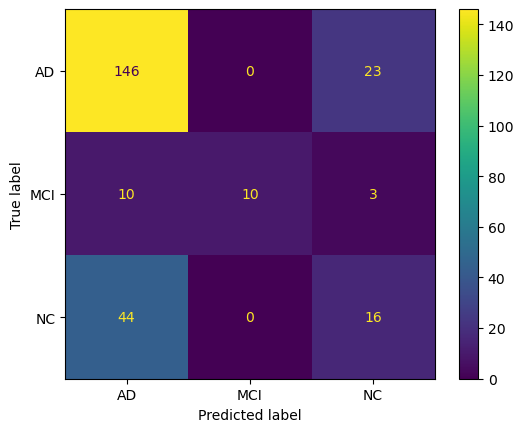

In [55]:
best_model = search.best_estimator_

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_).plot()

In [56]:
# save the obtained model (to avoid re-traning the model)
import joblib
joblib.dump(best_model, "models/random_forest_mirna.pkl")

['models/random_forest_mirna.pkl']

### Enhance classifications: explainability with SHAP

In [57]:
import joblib, shap, pandas as pd, numpy as np
from pathlib import Path

model_path = Path("models/random_forest_mirna.pkl")
best_model = joblib.load(model_path)

DATA_PATH = Path("data/result/patient_full_embeddings.csv")
df      = pd.read_csv(DATA_PATH)

# replicate the same preprocessing as in the training phase
X   = df.drop(columns=["patient_id", "country", "disease", "age", "apoe4"])
y   = df["disease"]


In [58]:
pre = best_model.named_steps["preprocess"]

feature_names = pre.get_feature_names_out()
print(len(feature_names))        


130


In [59]:
# Use shap.Explainer for tree-based models
explainer = shap.Explainer(
    best_model.named_steps["model"],          
    pre.transform(X),                         
    feature_names=feature_names,
    algorithm="tree"
)

In [60]:
X_test_pre = pre.transform(X_test)

shap_values = explainer(X_test_pre, check_additivity=False)  

 99%|===================| 750/756 [00:17<00:00]        

In [61]:
def top_features_for_instance(shap_vals, feature_names, idx, N=10, class_id=None, X_test_pre=None):
    """
    Returns a DataFrame with the N most influential features (in absolute value)
    for the instance `idx` and for the class `class_id`, including the value of the preprocessed feature.
    """
    sv = shap_vals.values if isinstance(shap_vals, shap.Explanation) else shap_vals

    if class_id is None:
        class_id = np.abs(sv[idx]).sum(axis=0).argmax()

    vals  = sv[idx, :, class_id]
    order = np.argsort(-np.abs(vals))[:N]

    features     = np.array(feature_names)[order]
    shap_values  = vals[order]
    directions   = ["+" if v > 0 else "-" for v in shap_values]

    # adding raw values if available
    raw_values = X_test_pre[idx][order] if X_test_pre is not None else ["?"] * N

    return pd.DataFrame({
        "feature"       : features,
        "shap_value"    : shap_values,
        "raw_value"     : raw_values,
        "direction (+ ⇒ pro‑class)" : directions
    })

Interpreting results:

- Positive SHAP value: the feature contributes to push the prediction towards the predicted class
- Negative SHAP value: the feature contributes to push the prediction away the predicted class

- Positive raw value: the feature has a higher value with respect to the preprocessing
- Negative raw value: the feature has a lower value with respect to the preprocessing

- +: the feature favors the predicted class
- -: the feature contrasts with the predicted class

In [62]:
idx = 0  # an example

pred_label = best_model.predict(X_test.iloc[[idx]])[0]
class_id   = np.where(best_model.classes_ == pred_label)[0][0]

df_top = top_features_for_instance(
    shap_values, feature_names, idx, N=15, class_id=class_id, X_test_pre=X_test_pre
)

df_top

,feature,shap_value,raw_value,direction (+ ⇒ pro‑class)
0,num__99,-0.006590,-0.034114,-
1,num__71,-0.006399,0.019246,-
2,num__90,-0.006336,0.009860,-
3,num__62,0.005255,-0.132879,+
4,num__127,-0.005173,0.020084,-
5,cat__sex_male,0.005007,0.000000,+
6,num__37,0.004582,-0.107724,+
7,num__31,0.004373,-0.111396,+
8,num__64,-0.004359,0.012276,-
9,num__113,-0.004295,0.076539,-


### Mappping miRNA influence over a prediction based on extracted features

In [63]:
mapping_df = pd.read_csv(
    "data/result/pruned_lasso_coefficients_nonzero.csv",
    index_col=0          
)

In [64]:
def mirna_explain(
        shap_df: pd.DataFrame,      # feature, shap_value, raw_value
        mapping_df: pd.DataFrame,
        top_k_feat_per_mirna: int = 3
    ) -> pd.DataFrame:
    """
    Aligning explainability at feature-level and miRNA-level.

    Parameters
    ----------
    shap_df : DataFrame with columns ['feature', 'shap_value', 'raw_value'].
    mapping_df : DataFrame idx='Feature_x', columns=miRNA, values=coeff.
    top_k_feat_per_mirna : how many feature names to return (stringa "feat1, feat2 ...").

    Returns
    -------
    df_mirna : miRNA, aggregated_weight, agg_raw, n_features, top_features
    """
    import re
    from collections import defaultdict
    import numpy as np
    import pandas as pd

    agg_weight  = defaultdict(float)    # aggregated SHAP weights per miRNA
    agg_raw     = defaultdict(float)    # aggregated raw values per miRNA
    feat_list   = defaultdict(list)     # list of most influent features per miRNA

    for _, row in shap_df.iterrows():
        # processing (needed to match the mapping_df index)
        m = re.search(r'(\d+)', row['feature'])
        feat_key = f"Feature_{m.group(1)}" if m else row['feature']
        if feat_key not in mapping_df.index:
            continue

        coeff_series = mapping_df.loc[feat_key]

        # update aggregated values
        agg_weight.update({mi: agg_weight[mi] + coeff_series[mi] * row['shap_value']
                           for mi in coeff_series.index})
        agg_raw.update({mi: agg_raw[mi] + coeff_series[mi] * row['raw_value']
                        for mi in coeff_series.index})
        for mi in coeff_series.index:
            if len(feat_list[mi]) < top_k_feat_per_mirna:
                feat_list[mi].append(row['feature'])

    df = (
        pd.DataFrame({
            "miRNA":   agg_weight.keys(),
            "aggregated_weight": agg_weight.values(),
            "agg_raw": [agg_raw[mi] for mi in agg_weight.keys()],
            "n_features": [len(feat_list[mi]) for mi in agg_weight.keys()],
            "top_features": [", ".join(feat_list[mi]) for mi in agg_weight.keys()]
        })
        .query("aggregated_weight != 0")
        .sort_values("aggregated_weight", ascending=False)
        .reset_index(drop=True)
    )
    return df


In [65]:
shap_df = top_features_for_instance(
    shap_values, feature_names, idx,
    N=50, class_id=class_id, X_test_pre=X_test_pre
)

mirna_detailed = mirna_explain(shap_df, mapping_df, top_k_feat_per_mirna=3)

mirna_detailed.head(10)


,miRNA,aggregated_weight,agg_raw,n_features,top_features
0,hsa-miR-6729-5p,0.014208,-0.494458,3,"num__99, num__71, num__90"
1,hsa-miR-6087,0.011485,-0.224394,3,"num__99, num__71, num__90"
2,hsa-miR-4734,0.007535,-0.173644,3,"num__99, num__71, num__90"
3,hsa-miR-2861,0.007236,-0.338853,3,"num__99, num__71, num__90"
4,hsa-miR-7704,0.004654,-0.295750,3,"num__99, num__71, num__90"
5,hsa-miR-6895-5p,0.003442,-0.095422,3,"num__99, num__71, num__90"
6,hsa-miR-1268a,0.003219,0.004115,3,"num__99, num__71, num__90"
7,hsa-miR-3663-3p,0.003176,-0.105550,3,"num__99, num__71, num__90"
8,hsa-miR-3665,0.003009,-0.096765,3,"num__99, num__71, num__90"
9,hsa-miR-6125,0.002939,-0.057554,3,"num__99, num__71, num__90"
